Back to **[Fan](https://fanwangecon.github.io/)**'s R4Econ Homepage **[Table of Content](https://fanwangecon.github.io/R4Econ/)**

# By Multiple Groups, Count the Number of Unique Observations (Individuals) within Group

We have multiple groups (country, village), we want to know the number of unique observations within these groups. 

In addition, we also want to generate the total number of observations for each variable within these country/village groups, these total observations includes multiple values for each unique individual.

## Function

This function takes in dataframe and a sym list of grouping variables.

In [13]:
# Data Function
# https://fanwangecon.github.io/R4Econ/summarize/count/ByGroupCountUniqueIndi.html
f.by.group.unique.obs <- function(df,
                                  vars.group = c('S.country', 'vil.id'),
                                  var.unique.identifier = 'indi.id',
                                  graph=TRUE) {
    
    vars.all <- names(df)
    df.group.unique <- df %>% group_by(!!!syms(vars.group)) %>%
          arrange(!!!syms(vars.group)) %>%
          mutate_if(is.numeric, funs(n=sum(is.na(.)==0))) %>%
          mutate(unique_indi = n_distinct(!!sym(var.unique.identifier))) %>%
          slice(1L) %>%
          select(!!!syms(vars.group), unique_indi, everything(), -!!var.unique.identifier, 
                -one_of(vars.all))
    
    if (graph){
        graph <- graphf.by.group.unique.obs(df.group.unique, vars.group)
        return(list(df=df.group.unique, graph=graph))
    } else {
        return(list(df=df.group.unique))
    }
}

In [14]:
# Graphing Function
# https://fanwangecon.github.io/R4Econ/summarize/count/ByGroupCountUniqueIndi.html
graphf.by.group.unique.obs <- function(df.by.group,
                                       vars.group = c('S.country', 'vil.id')) {
    color.var <- vars.group[1]
    x.var <- vars.group[2]

    # x-var as factor
    df.by.group[[x.var]] <- factor(df.by.group[[x.var]])

    # Graph Size
    options(repr.plot.width = 8, repr.plot.height = 4)

    # Titling
    graph.title <- sprintf('Number of Unique %s By (%s and %s) Groups', 
                           var.unique.identifier, color.var, x.var)
    graph.caption <- sprintf(
        paste0('Jitter/Random Hgt/Wgt Guat/Cebu Data\n',
               'see:https://fanwangecon.github.io/HeightProfile/'))
    graph.title.x <- sprintf('%s Groups', x.var)
    graph.title.y <- sprintf('Number of Unique %s', var.unique.identifier)


    # Graphing (unique_indi used earlier as name)
    graph <- df.by.group %>% 
        select(one_of(vars.group), unique_indi) %>% 
        gather(variable, value, -one_of(vars.group)) %>% 
        ggplot(aes(x=!!sym(x.var), y=value))  + 
        geom_bar(stat = 'identity', position="dodge")  + 
        facet_wrap(as.formula(paste0('~', color.var)), ncol=2, scales = "free")  + 
        labs(title = graph.title,
             x = graph.title.x, y = graph.title.y,
             caption = graph.caption) +
        theme(axis.text.x = element_text(angle = 90))
    
    return(graph)
}

## Data

In our sample dataset, there are different numbers of children within each country and village. 

We have two key grouping variables:
1. Country
2. 4 villages in guatemala and dozens in Cebu. 

A child in a village could be observed for many times, so we will also show the number of times all the children in each village is observed by for each of the variables. 

In [15]:
# Library
library(tidyverse)

# Load Sample Data
setwd('C:/Users/fan/R4Econ/_data/')
df <- read_csv('height_weight.csv')

Parsed with column specification:
cols(
  S.country = col_character(),
  vil.id = col_double(),
  indi.id = col_double(),
  sex = col_character(),
  svymthRound = col_double(),
  momEdu = col_double(),
  wealthIdx = col_double(),
  hgt = col_double(),
  wgt = col_double(),
  hgt0 = col_double(),
  wgt0 = col_double(),
  prot = col_double(),
  cal = col_double(),
  p.A.prot = col_double(),
  p.A.nProt = col_double()
)


## Use Function with Data

The results below show that:

1. Each village has different numbers of unique individuals
2. Each individual is observed for multiple times

In [16]:
vars.group = c('S.country', 'vil.id')
var.unique.identifier = 'indi.id'
group.unique.obs.df <- f.by.group.unique.obs(df, vars.group, var.unique.identifier, graph=TRUE)

Adding missing grouping variables: `S.country`, `vil.id`


### Table

This is the tabular version of results

In [17]:
group.unique.obs.df$df
# color.var <- vars.group[1]
#     x.var <- vars.group[2]

# # x-var as factor
# df.by.group[[x.var]] <- factor(df.by.group[[x.var]])

# # Graph Size
# options(repr.plot.width = 8, repr.plot.height = 4)

# # Titling
# graph.title <- sprintf('Number of Unique %s By (%s and %s) Groups', 
#                        var.unique.identifier, color.var, x.var)
# graph.caption <- sprintf(
#     paste0('Jitter/Random Hgt/Wgt Guat/Cebu Data\n',
#            'see:https://fanwangecon.github.io/HeightProfile/'))
# graph.title.x <- sprintf('%s Groups', x.var)
# graph.title.y <- sprintf('Number of Unique %s', var.unique.identifier)


# # Graphing (unique_indi used earlier as name)
# df.by.group %>% 
#     select(one_of(vars.group), unique_indi) %>% 
#     gather(variable, value, -one_of(vars.group)) %>% 
#     ggplot(aes(x=!!sym(x.var), y=value))  + 
#     geom_bar(stat = 'identity', position="dodge")  + 
#     facet_wrap(as.formula(paste0('~', color.var)), ncol=2, scales = "free")  + 
#     labs(title = graph.title,
#          x = graph.title.x, y = graph.title.y,
#          caption = graph.caption) +
#     theme(axis.text.x = element_text(angle = 90, hjust = 1))

S.country,vil.id,unique_indi,indi.id_n,svymthRound_n,momEdu_n,wealthIdx_n,hgt_n,wgt_n,hgt0_n,wgt0_n,prot_n,cal_n,p.A.prot_n,p.A.nProt_n
Cebu,1,60,1080,1080,1080,1080,971,971,1080,1080,726,726,733,733
Cebu,2,31,558,558,558,558,467,467,558,558,373,373,320,320
Cebu,3,91,1638,1638,1638,1638,1387,1388,1620,1620,1075,1075,1083,1083
Cebu,4,62,1116,1116,1116,1116,1004,1003,1116,1116,771,771,782,782
Cebu,5,8,144,144,144,144,127,127,144,144,93,93,93,93
Cebu,6,46,828,828,828,828,749,749,828,828,566,566,566,566
Cebu,7,64,1152,1152,1152,1152,976,976,1152,1152,763,763,783,783
Cebu,8,39,699,699,699,699,600,601,699,699,475,475,416,416
Cebu,9,81,1458,1458,1458,1458,1363,1363,1458,1458,1025,1025,1034,1034
Cebu,10,84,1512,1512,1512,1512,1271,1270,1512,1512,1002,1002,973,973


### Graph

This is the graphical version of results

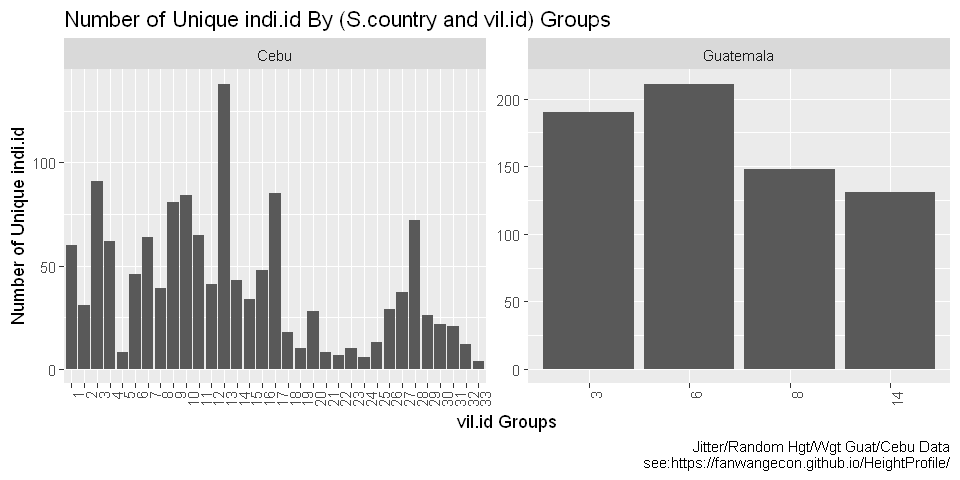

In [18]:
group.unique.obs.df$graph